In [1]:
from xai.policy import *
import matplotlib.pyplot as plt

import mnist
import torch
import random
import numpy as np

In [2]:
images = torch.from_numpy(mnist.train_images())
images = images.float()/255.0

labels = torch.from_numpy(mnist.train_labels())
labels_one_hot = torch.zeros((labels.shape[0],10)).float()
labels_one_hot[torch.arange(0,labels.shape[0]),labels.int()] = 1.0

images.shape, labels_one_hot.shape

(torch.Size([60000, 28, 28]), torch.Size([60000, 10]))

In [3]:
encoder = Policy.new((28,28),5)
decoder = Policy.new(5,(28,28))
autoencoder = encoder + decoder
autoencoder

/home/eivind/master-project/.venv/lib/python3.11/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


Sequential(
  (0): Linear(in_features=784, out_features=524, bias=True)
  (1): ReLU()
  (2): Linear(in_features=524, out_features=264, bias=True)
  (3): ReLU()
  (4): Linear(in_features=264, out_features=5, bias=True)
  (5): Linear(in_features=5, out_features=264, bias=True)
  (6): ReLU()
  (7): Linear(in_features=264, out_features=524, bias=True)
  (8): ReLU()
  (9): Linear(in_features=524, out_features=784, bias=True)
)

In [4]:
stats = autoencoder.adam().fit(
    X=images,
    Y=images,
    epochs=1000,
    batch_size=64,
    loss_criterion="MSELoss",
    verbose=True,
    info="Autoencoder test"
)
stats[5:].plot_loss()

Loss: 0.029823: 100%|██████████| 1000/1000 [00:14<00:00, 67.22it/s]


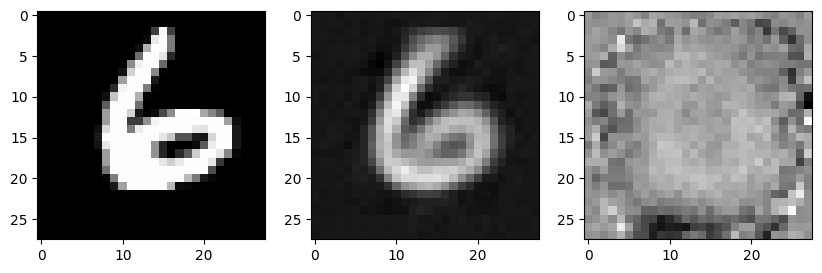

In [5]:
X = images[random.randint(0,len(images))]
feedforward = autoencoder(X)

Y = feedforward.numpy()

dY = feedforward.derivative(lambda t: t.sum(), order=1).cpu().numpy()

fig = plt.figure(figsize=(10,7)) 
fig.add_subplot(1,3,1)
plt.imshow(X, cmap="gray") 
fig.add_subplot(1,3,2)
plt.imshow(Y, cmap="gray") 
fig.add_subplot(1,3,3)
plt.imshow(dY, cmap="gray")

In [6]:
scale = 3
big_images = torch.from_numpy(mnist.train_images().repeat(scale,1).repeat(scale,2))
big_images = big_images.float()/255.0

labels = torch.from_numpy(mnist.train_labels())
labels_one_hot = torch.zeros((labels.shape[0],10)).float()
labels_one_hot[torch.arange(0,labels.shape[0]),labels.int()] = 1.0

big_images.shape, labels_one_hot.shape

(torch.Size([60000, 84, 84]), torch.Size([60000, 10]))

In [7]:
big_encoder = Policy.new((28*scale,28*scale),5)
big_decoder = Policy.new(5,(28*scale,28*scale))
big_autoencoder = big_encoder + big_decoder
big_autoencoder

Sequential(
  (0): Linear(in_features=7056, out_features=4705, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4705, out_features=2355, bias=True)
  (3): ReLU()
  (4): Linear(in_features=2355, out_features=5, bias=True)
  (5): Linear(in_features=5, out_features=2355, bias=True)
  (6): ReLU()
  (7): Linear(in_features=2355, out_features=4705, bias=True)
  (8): ReLU()
  (9): Linear(in_features=4705, out_features=7056, bias=True)
)

In [8]:
stats = big_autoencoder.adam().fit(
    X=big_images,
    Y=big_images,
    epochs=1000,
    batch_size=64,
    loss_criterion="MSELoss",
    verbose=True,
    info="Big autoencoder train test"
)
stats[5:].plot_loss()

Loss: 0.045309:  16%|█▌        | 159/1000 [02:21<12:31,  1.12it/s]


KeyboardInterrupt: 

In [ ]:
X = big_images[random.randint(0,len(big_images))]
feedforward = big_autoencoder.predict(X)

Y = feedforward.numpy()

dY = feedforward.derivative(lambda t: t.sum(), order=1).cpu().numpy()

fig = plt.figure(figsize=(10,7)) 
fig.add_subplot(1,3,1)
plt.imshow(X, cmap="gray") 
fig.add_subplot(1,3,2)
plt.imshow(Y, cmap="gray") 
fig.add_subplot(1,3,3)
plt.imshow(dY, cmap="gray")